# Sklearn for Machine Learning

This notebook will be focused on using sklearn for machine learning capabilities. I will be using IRIS dataset with SVM classifier to classify the dataset according to flower class.


## Imports and data loading


In [153]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import numpy as np


In [154]:
# loading the dataset
# sklearn uses a native datatype to the package
iris_data = datasets.load_iris()
print(iris_data.feature_names, iris_data.target_names)

data_x = iris_data.data
data_y = iris_data.target


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


## Data preprocessing

Raw data in itself cannot be used effectively to get a better performing model. Therefore we need to perform some pre-analysis and data preprocessing. Once the machine learning model is trained we can use the inference results and reprocess them to get into original scales


In [155]:
"""
Although SCIPY is a different package to sklearn, I am using normal test to idenitfy the features with normality. This is benefitial to normalise the normally dirtributed features and min max scale the other features.

`scipy.stats.normaltest(feature).pvalue` gives the p-value of the feature and I am deciding that the feature is normal or not depending if the p-value is greater than 0.05

Then I use sklearns scaling functions to scale the features.

Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html?highlight=stats%20normaltest#scipy.stats.normaltest
"""

for idx in range(0, 4):
    print(iris_data.feature_names[idx] + " Normality",
          scipy.stats.normaltest(data_x[:, idx]).pvalue > 0.05)



sepal length (cm) Normality True
sepal width (cm) Normality True
petal length (cm) Normality False
petal width (cm) Normality False


We will use zscaling for sepal length and sepal width and we will use max min scaling for petal length


In [156]:
from sklearn.preprocessing import label_binarize

"""
`sklearn.preprocessing` includes a wide array of preprocessing related functionality. I am using MinMaxScaler() and StandardScaler() to reduce the range of the features. This is done by first creating an instance of the scaler classes and using fit_transform functions.

Reference: https://scikit-learn.org/stable/modules/preprocessing.html
"""
minmax_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

sepal_length = standard_scaler.fit_transform(data_x[:, 0].reshape(-1, 1))
sepal_width = standard_scaler.fit_transform(data_x[:, 1].reshape(-1, 1))
petal_length = minmax_scaler.fit_transform(data_x[:, 2].reshape(-1, 1))
petal_width = minmax_scaler.fit_transform(data_x[:, 3].reshape(-1, 1))

np_data_x = np.hstack(
    (sepal_length, sepal_width, petal_length, petal_width))

df_x = pd.DataFrame(np_data_x, columns=iris_data.feature_names)

"""
Label Binerizer makes the nominal to binary encoding of the variable. This allows machine learning models to predict the the target label

`label_binerize` divides the data into their own fields
"""
df_y: pd.DataFrame = pd.DataFrame(label_binarize(
    data_y, classes=[0, 1, 2]), columns=iris_data.target_names)

# df_x.head()
df_y

# data is now properly scaled!


,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


## Test Train Split

Usually when we use machine learning about 20% of data must be used at test data to validate out model. Therefore we must split our dataset to test train sets so we can train models and validate their performances.


In [157]:
"""
`train_test_split` divides the datasets to train and test datasets. This is a very useful function as any machine learning models must be tested after training. We can set the division of the dataset (20% to 80%) test to train size. Random state of the function shuffles the dataset so any sorted data will not affect the performance of the dataset.
"""
train_x, test_x, train_y, test_y = train_test_split(
    df_x.to_numpy(), df_y.to_numpy(), test_size=0.2, random_state=42)


## Models

### SVM

In [158]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

"""
SVC is support vector classifier we can use this classifier with OneVsRest mode to use it as a multiclass classifier. Then using fit function we can train our multiclass svm. 

The reason for OneVsRestClassifier is that SVC is a binary classifier and we have to train multiple SVC classifiers to create the multiclass classifier.
"""
classifier_svm = OneVsRestClassifier(SVC(random_state=12))
classifier_svm.fit(train_x, train_y)


OneVsRestClassifier(estimator=SVC(random_state=12))

In [159]:
from sklearn.metrics import accuracy_score

"""
Accuracy score from sklearn.metric package can be used to evaluate the performance of our model. This means that we can use our test dataset and the labels to make predictions and evaluate performance.
"""
acc = accuracy_score(test_y, classifier_svm.predict(test_x))
print(acc*100)


93.33333333333333


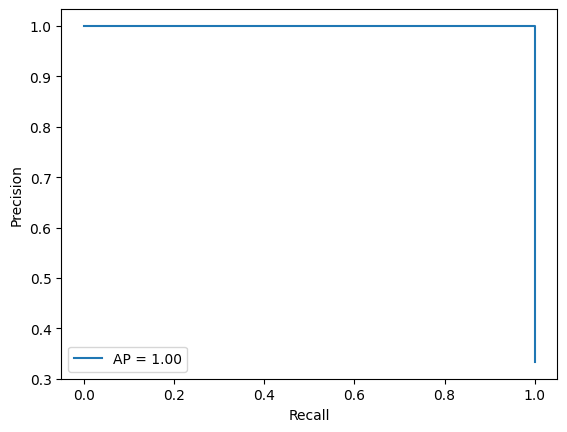

In [160]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

"""
Sometime accuracy itself is not enough to evaluate the performance of our classifier. More on that in this article https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9/ 
General idea is that we cant to involve the other values of the confusion matrix to our evaluation as well. We can develop the precision recall curve to see the performance of the model.
"""

score_y = classifier_svm.decision_function(test_x)

precision = dict()
recall = dict()
precision_avg = dict()

for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(
        test_y[:, i], score_y[:, i])
    precision_avg[i] = average_precision_score(test_y[:, i], score_y[:, i])

class_id = 0
display = PrecisionRecallDisplay(
    recall=recall[class_id],
    precision=precision[class_id],
    average_precision=precision_avg[class_id],
)
display.plot()


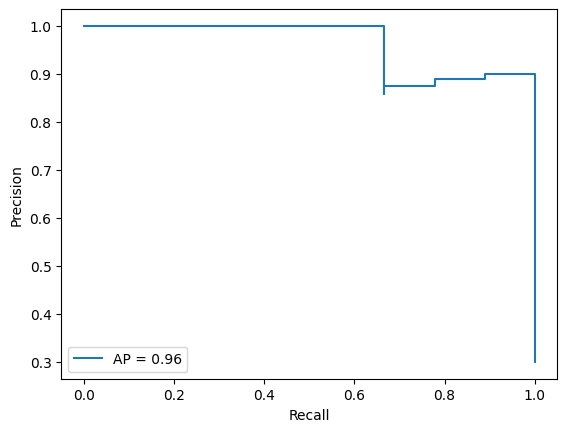

In [161]:
class_id = 1
display = PrecisionRecallDisplay(
    recall=recall[class_id],
    precision=precision[class_id],
    average_precision=precision_avg[class_id],
)
display.plot()


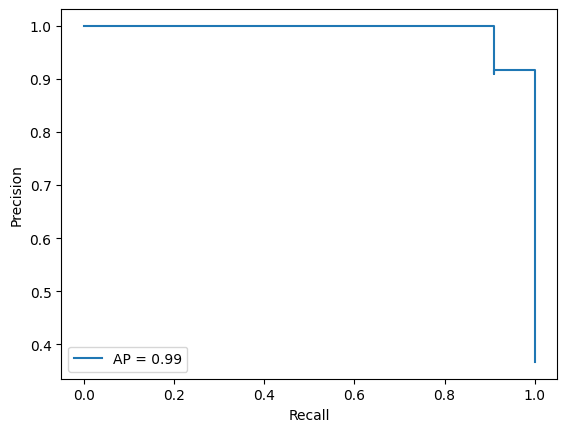

In [162]:
class_id = 2
display = PrecisionRecallDisplay(
    recall=recall[class_id],
    precision=precision[class_id],
    average_precision=precision_avg[class_id],
)
display.plot()


## References

[Kaggle Iris](https://www.kaggle.com/code/mgabrielkerr/visualizing-knn-svm-and-xgboost-on-iris-dataset)
